In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
import nltk

In [34]:
df=pd.read_csv('/content/amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [37]:
#1.What is the average rating for each product category?
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

average_ratings = df.groupby('category')['rating'].mean().reset_index()

print("Average Rating by Product Category:")
print(average_ratings)

Average Rating by Product Category:
                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


In [38]:
#2.What are the top rating_count products by category?
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

top_rating_count = df.loc[df.groupby('category')['rating_count'].idxmax()][
    ['category', 'product_name', 'rating_count', 'rating']
]

top_rating_count = top_rating_count.reset_index(drop=True)

print("Top Rating Count Products by Category:")
print(top_rating_count)

Top Rating Count Products by Category:
                                              category  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...   
1    Computers&Accessories|Accessories&Peripherals|...   
2    Computers&Accessories|Accessories&Peripherals|...   
3    Computers&Accessories|Accessories&Peripherals|...   
4    Computers&Accessories|Accessories&Peripherals|...   
..                                                 ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...   
207  OfficeProducts|OfficePaperProducts|Paper|Stati...   
208  OfficeProducts|OfficePaperProducts|Paper|Stati...   
209  OfficeProducts|OfficePaperProducts|Paper|Stati...   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                          product_name  rating_count  rating  
0    Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0     3.8  
1    rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4426.0     4.3  
2    Hp Wired On Ear Headph

Summary Statistics for Discounted Price and Actual Price:
       discounted_price   actual_price
count       1465.000000    1465.000000
mean        3125.310874    5444.990635
std         6944.304394   10874.826864
min           39.000000      39.000000
25%          325.000000     800.000000
50%          799.000000    1650.000000
75%         1999.000000    4295.000000
max        77990.000000  139900.000000


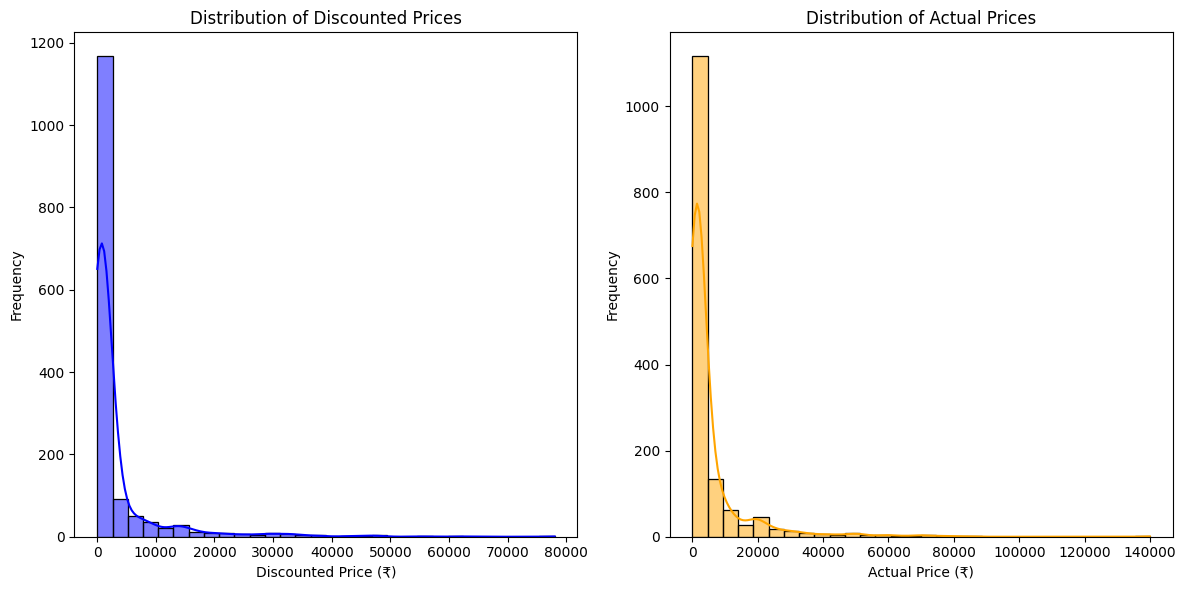

In [39]:
#3.What is the distribution of discounted prices vs. actual prices?
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

print("Summary Statistics for Discounted Price and Actual Price:")
print(df[['discounted_price', 'actual_price']].describe())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['discounted_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['actual_price'], bins=30, kde=True, color='orange')
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
#4. How does the average discount percentage vary across categories?
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

avg_discount = df.groupby('category')['discount_percentage'].mean().reset_index()

avg_discount = avg_discount.sort_values(by='discount_percentage', ascending=False)

print("Average Discount Percentage by Category:")
print(avg_discount)

Average Discount Percentage by Category:
                                              category  discount_percentage
6    Computers&Accessories|Accessories&Peripherals|...                 90.0
75   Electronics|Headphones,Earbuds&Accessories|Ear...                 90.0
106  Electronics|Mobiles&Accessories|MobileAccessor...                 90.0
73   Electronics|Headphones,Earbuds&Accessories|Ada...                 88.0
14   Computers&Accessories|Accessories&Peripherals|...                 87.5
..                                                 ...                  ...
197  OfficeProducts|OfficeElectronics|Calculators|F...                  0.0
199  OfficeProducts|OfficePaperProducts|Paper|Copy&...                  0.0
205  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


In [43]:
#5. What are the most popular product names?

popular_products = df[['product_name', 'rating_count', 'rating', 'category']].sort_values(
    by='rating_count', ascending=False
)

print("Top 5 Most Popular Product Names by Rating Count:")
print(popular_products.head(5))

Top 5 Most Popular Product Names by Rating Count:
                                          product_name  rating_count  rating  \
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0     4.4   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0     4.4   
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0     4.4   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0     4.4   
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0     4.1   

                                              category  
47   Electronics|HomeTheater,TV&Video|Accessories|C...  
65   Electronics|HomeTheater,TV&Video|Accessories|C...  
12   Electronics|HomeTheater,TV&Video|Accessories|C...  
684  Electronics|HomeTheater,TV&Video|Accessories|C...  
400  Electronics|Headphones,Earbuds&Accessories|Hea...  


In [49]:
from typing import Counter
#6. What are the most popular product keywords?
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english')).union({'black', 'white', 'grey', '1m', '15m', '2m', '3m', 'mm', 'v', 'w', 'mah', 'n150'})


def extract_keywords(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)

    words = [word for word in text.split() if word not in stop_words and len(word) > 2 and not word.isdigit()]
    return words

df['keywords'] = df['product_name'].apply(extract_keywords)

keyword_counts = []
for index, row in df.iterrows():
    for keyword in row['keywords']:
        keyword_counts.append((keyword, row['rating_count']))

keyword_agg = Counter()
for keyword, count in keyword_counts:
    if pd.notna(count):
        keyword_agg[keyword] += count

top_keywords = keyword_agg.most_common(10)

top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Total Rating Count'])

print("Top 10 Most Popular Product Keywords by Rating Count:")
print(top_keywords_df)

Top 10 Most Popular Product Keywords by Rating Count:
    Keyword  Total Rating Count
0       usb           7884123.0
1     cable           6592899.0
2       ear           5191243.0
3       mic           5025073.0
4      boat           4450099.0
5  charging           3624452.0
6     wired           3466365.0
7  wireless           3419491.0
8      fast           3294792.0
9      type           3287431.0


In [55]:
#7.What are the most popular product reviews?
popular_products = df[['product_name']].sort_values( by=['product_name'], ascending=False)
print("Top 5 Most Popular Product Reviews by Rating Count:")
print(popular_products.head(5))

Top 5 Most Popular Product Reviews by Rating Count:
                                          product_name
722  tizum HDMI to VGA Adapter Cable 1080P for Proj...
21   tizum HDMI to VGA Adapter Cable 1080P for Proj...
695  rts [2 Pack] Mini USB C Type C Adapter Plug, T...
439  realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...
383  realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...


In [58]:
#8. What is the correlation between discounted_price and rating?

if df['discounted_price'].dtype != float:
    df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

correlation = df['discounted_price'].corr(df['rating'], method='pearson')
print(f"Pearson Correlation between Discounted Price and Rating: {correlation:.4f}")

Pearson Correlation between Discounted Price and Rating: 0.1203


In [59]:
#9. What are the Top 5 categories based on the highest rating?
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Categories based on Highest Rating:")
print(top_categories)

Top 5 Categories based on Highest Rating:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [60]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

avg_discount = df.groupby('category')['discount_percentage'].mean().reset_index()
low_discount_cats = avg_discount[avg_discount['discount_percentage'] < 30].sort_values(by='discount_percentage')

avg_rating = df.groupby('category')['rating'].mean().reset_index()
low_rating_cats = avg_rating[avg_rating['rating'] < 4.0].sort_values(by='rating')

high_engagement = df[['category', 'product_name', 'rating', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)
low_engagement = df[df['rating_count'] < 5000][['category', 'product_name', 'rating', 'rating_count']].sort_values(by='rating_count')

correlation = df['discounted_price'].corr(df['rating'], method='pearson')

# Print results
print("1. Categories with Low Average Discounts (<30%):")
print(low_discount_cats[['category', 'discount_percentage']].to_string(index=False))
print("\n2. Categories with Low Average Ratings (<4.0):")
print(low_rating_cats[['category', 'rating']].to_string(index=False))
print("\n3. Top 5 High-Engagement Products (by Rating Count):")
print(high_engagement[['product_name', 'rating_count', 'rating']].head(5).to_string(index=False))
print("\n4. Correlation between Discounted Price and Rating:")
print(f"Pearson Correlation: {correlation:.4f}")

1. Categories with Low Average Discounts (<30%):
                                                                                                              category  discount_percentage
                                                          Electronics|HomeAudio|MediaStreamingDevices|StreamingClients             0.000000
                                                                      Electronics|Cameras&Photography|Accessories|Film             0.000000
                                                                         Home&Kitchen|CraftMaterials|PaintingMaterials             0.000000
                                       Home&Kitchen|CraftMaterials|DrawingMaterials|DrawingMedia|Pencils|WoodenPencils             0.000000
                                             OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper             0.000000
                                                       OfficeProducts|OfficeElectronics|Calculators|Financial&B